Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D


In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/AIML/Skincancerimglib/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/AIML/Skincancerimglib/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

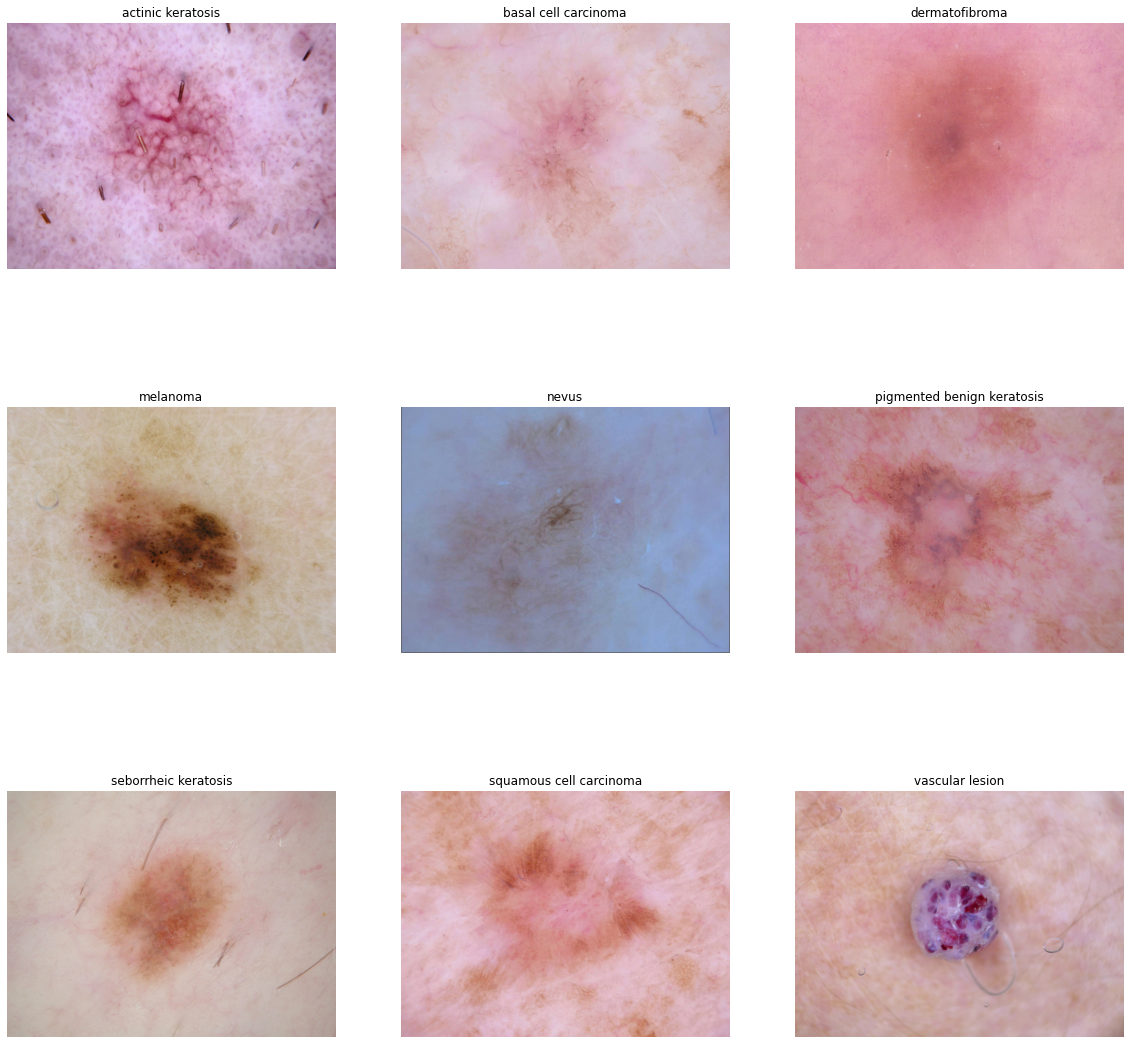

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[0]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
from keras.layers import MaxPool2D
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(num_classes, activation = "softmax"))



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [14]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 311s 1s/step - loss: 2.0306 - accuracy: 0.2176 - val_loss: 1.8348 - val_accuracy: 0.3602
Epoch 2/30
56/56 [==============================] - 3s 59ms/step - loss: 1.7339 - accuracy: 0.3850 - val_loss: 1.5728 - val_accuracy: 0.4407
Epoch 3/30
56/56 [==============================] - 3s 59ms/step - loss: 1.6374 - accuracy: 0.4107 - val_loss: 1.5337 - val_accuracy: 0.4743
Epoch 4/30
56/56 [==============================] - 3s 59ms/step - loss: 1.5496 - accuracy: 0.4408 - val_loss: 1.5917 - val_accuracy: 0.4295
Epoch 5/30
56/56 [==============================] - 3s 59ms/step - loss: 1.4625 - accuracy: 0.4816 - val_loss: 1.4928 - val_accuracy: 0.4832
Epoch 6/30
56/56 [==============================] - 3s 60ms/step - loss: 1.4002 - accuracy: 0.5106 - val_loss: 1.4934 - val_accuracy: 0.4631
Epoch 7/30
56/56 [==============================] - 3s 60ms/step - loss: 1.3655 - accuracy: 0.5151 - val_loss: 1.4542 - val_accuracy: 0.4855
Epoch 8/30
56/56 [======

### Visualizing training results

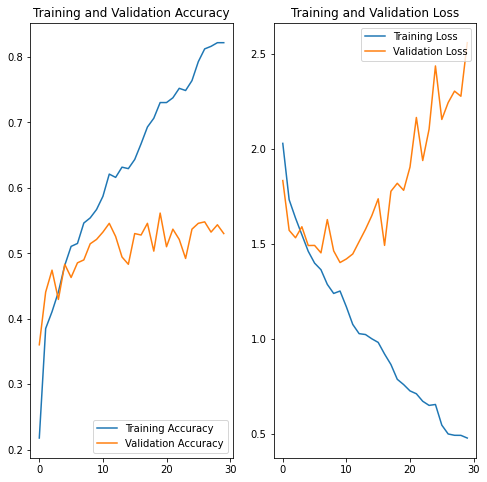

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
The error loss in the validation data set seems to have increased starting from 10th EPOC while it reduced consistently in training dataset. 

It appears that the model is overfitting consdering the patter of accuracy and error loss. 


In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.15, 0.15), width_factor=(0.15, 0.15), fill_mode='reflect')
])

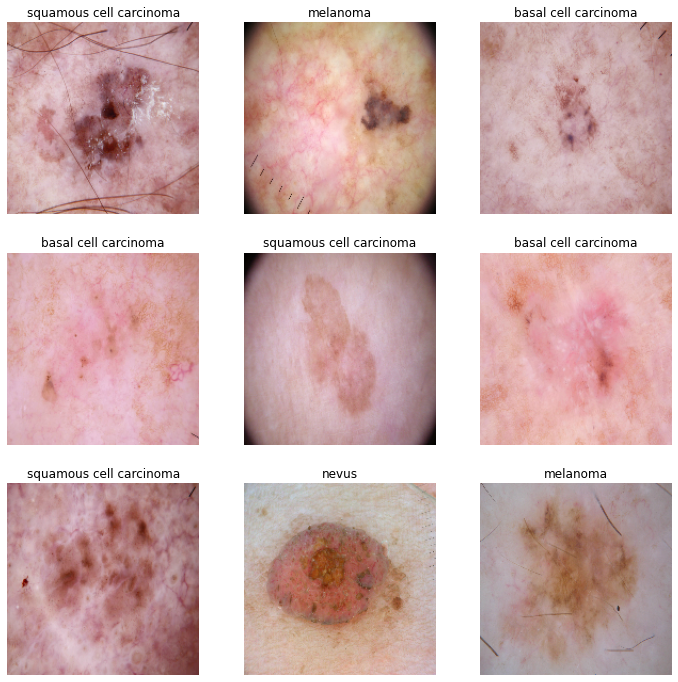

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 activation (Activation)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 activation_1 (Activation)   (None, 178, 178, 32)      0         
                                                      

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 9s 117ms/step - loss: 22.5383 - accuracy: 0.2645 - val_loss: 9.4644 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 5s 92ms/step - loss: 7.2761 - accuracy: 0.2846 - val_loss: 12.5763 - val_accuracy: 0.1745
Epoch 3/30
56/56 [==============================] - 5s 92ms/step - loss: 2.8753 - accuracy: 0.2885 - val_loss: 33.6936 - val_accuracy: 0.2058
Epoch 4/30
56/56 [==============================] - 5s 92ms/step - loss: 2.3195 - accuracy: 0.2985 - val_loss: 14.4422 - val_accuracy: 0.2237
Epoch 5/30
56/56 [==============================] - 5s 92ms/step - loss: 2.0791 - accuracy: 0.3158 - val_loss: 23.2611 - val_accuracy: 0.2192
Epoch 6/30
56/56 [==============================] - 5s 92ms/step - loss: 1.8971 - accuracy: 0.3348 - val_loss: 15.2063 - val_accuracy: 0.3289
Epoch 7/30
56/56 [==============================] - 5s 92ms/step - loss: 1.8446 - accuracy: 0.3666 - val_loss: 7.3012 - val_accuracy: 0.3512
Epoch 8/30
56/56 

### Visualizing the results

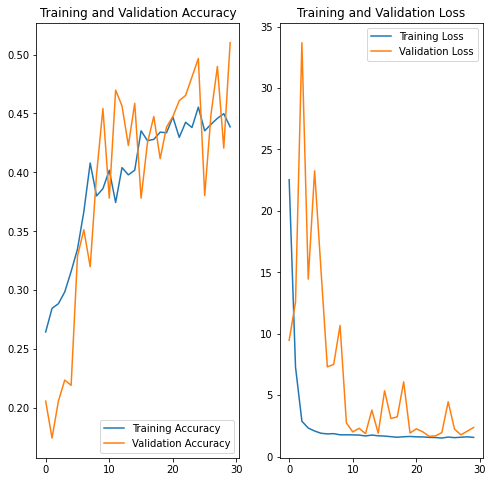

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
Though the accuracy has gone down , but looking at the overall run, the model does seem to be overfitting now. 
 The accuracy needs to be increased further say tuning hyperparameters, adding more layer. 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

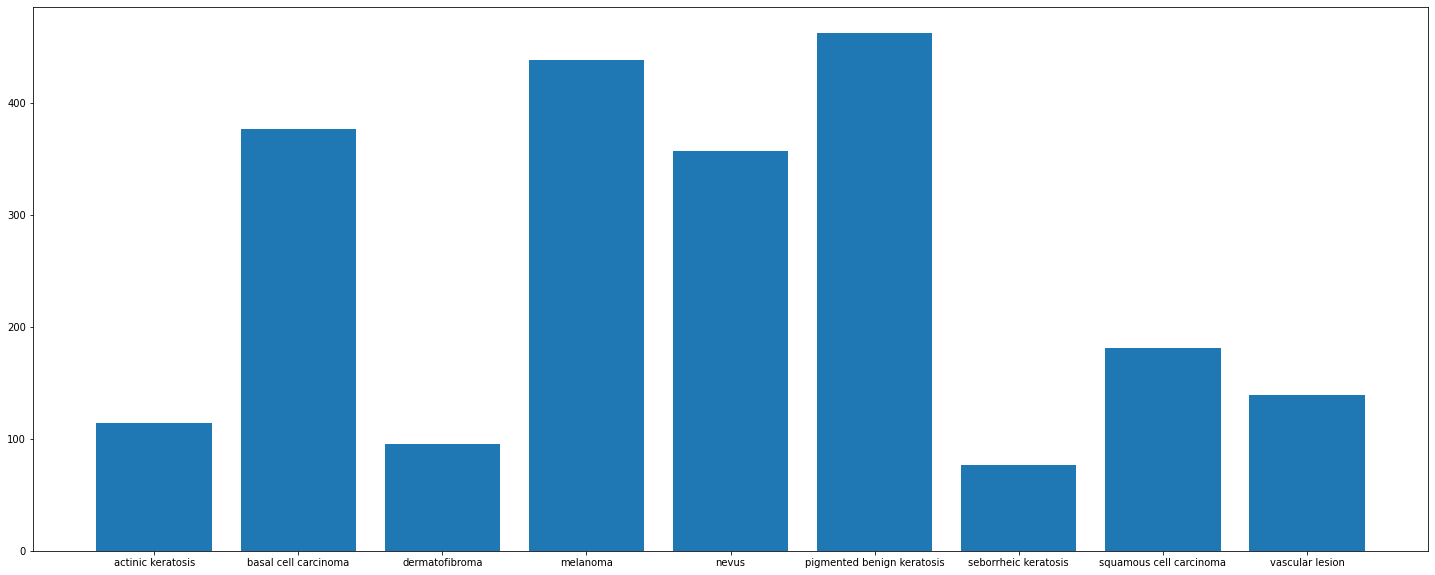

In [23]:
## Your code goes here.
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - numbers of samples for these 9 diseases are not uniformly distributed. 
#### - eborrheic keratosis has least number of samples
#### - pigmented benign keratosi followed by melanoma has most.
### - this may be one of the factor impacting accuracy of the model. 

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
path_to_training_dataset="/content/gdrive/MyDrive/AIML/Skincancerimglib/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/MyDrive/AIML/Skincancerimglib/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F5B8D2CE8D0>: 100%|██████████| 500/500 [00:40<00:00, 12.46 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5CB543F0D0>: 100%|██████████| 500/500 [00:49<00:00, 10.09 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F5B8B60C950>: 100%|██████████| 500/500 [00:40<00:00, 12.30 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F5B8CC0F450>: 100%|██████████| 500/500 [00:43<00:00, 11.41 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5B8B592950>: 100%|██████████| 500/500 [00:40<00:00, 12.23 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5B8B6C2B90>: 100%|██████████| 500/500 [00:41<00:00, 12.08 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5B8B60C810>: 100%|██████████| 500/500 [00:42<00:00, 11.89 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7F5B8AD9F950>: 100%|██████████| 500/500 [00:52<00:00,  9.59 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F5B8B6F2050>: 100%|██████████| 500/500 [00:51<00:00,  9.67 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output/")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [27]:
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/MyDrive/AIML/Skincancerimglib/...,actinic keratosis
1,/content/gdrive/MyDrive/AIML/Skincancerimglib/...,actinic keratosis
2,/content/gdrive/MyDrive/AIML/Skincancerimglib/...,actinic keratosis
3,/content/gdrive/MyDrive/AIML/Skincancerimglib/...,actinic keratosis
4,/content/gdrive/MyDrive/AIML/Skincancerimglib/...,actinic keratosis
...,...,...
4495,/content/gdrive/MyDrive/AIML/Skincancerimglib/...,vascular lesion
4496,/content/gdrive/MyDrive/AIML/Skincancerimglib/...,vascular lesion
4497,/content/gdrive/MyDrive/AIML/Skincancerimglib/...,vascular lesion
4498,/content/gdrive/MyDrive/AIML/Skincancerimglib/...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
new_df['Label'].value_counts()

pigmented benign keratosis    898
melanoma                      883
basal cell carcinoma          754
nevus                         728
squamous cell carcinoma       346
vascular lesion               301
actinic keratosis             243
dermatofibroma                185
seborrheic keratosis          162
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [29]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [30]:
data_dir_train="/content/gdrive/MyDrive/AIML/Skincancerimglib/Train/output"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [31]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [32]:
## your code goes here

from keras.layers import MaxPool2D
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [33]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [34]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


113/113 [==============================] - 22s 177ms/step - loss: 16.1668 - accuracy: 0.2939 - val_loss: 25.5377 - val_accuracy: 0.0400
Epoch 2/30
113/113 [==============================] - 20s 168ms/step - loss: 3.4159 - accuracy: 0.3206 - val_loss: 32.7956 - val_accuracy: 0.1533
Epoch 3/30
113/113 [==============================] - 20s 168ms/step - loss: 2.2769 - accuracy: 0.3644 - val_loss: 11.4230 - val_accuracy: 0.2467
Epoch 4/30
113/113 [==============================] - 20s 167ms/step - loss: 1.9275 - accuracy: 0.3739 - val_loss: 2.4870 - val_accuracy: 0.4000
Epoch 5/30
113/113 [==============================] - 20s 170ms/step - loss: 1.8494 - accuracy: 0.3983 - val_loss: 2.4675 - val_accuracy: 0.4422
Epoch 6/30
113/113 [==============================] - 20s 173ms/step - loss: 1.7604 - accuracy: 0.4186 - val_loss: 2.8034 - val_accuracy: 0.4700
Epoch 7/30
113/113 [==============================] - 20s 170ms/step - loss: 1.6526 - accuracy: 0.4433 - val_loss: 2.2600 - val_accuracy:

#### **Todo:**  Visualize the model results

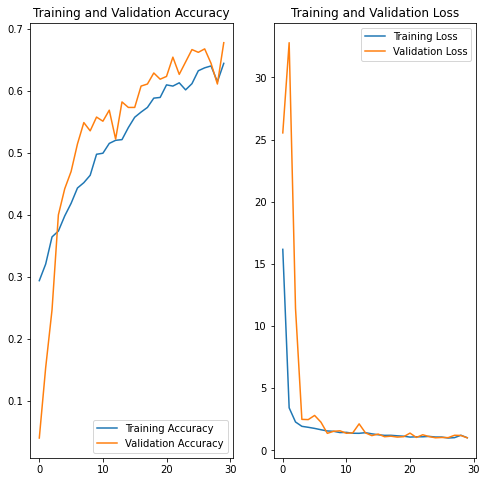

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
#### The accuracy improved and and the loss function dropped as well. The model also don't seem to overfit. 
